In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
%matplotlib inline

/home/mrigank/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
x_train,y_train,x_test,y_test,classes=load_dataset()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)


The label of the image is : [0]


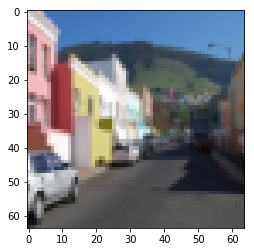

In [5]:
plt.imshow(x_train[1,])
print("The label of the image is : "+str(y_train[:,1]))

In [6]:
x_train=x_train.reshape(x_train.shape[0],-1).T
x_test=x_test.reshape(x_test.shape[0],-1).T
print ("sanity check after reshaping: " + str(x_train[0:5,0]))

sanity check after reshaping: [17 31 56 22 33]


In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
def sigmoid(z):
    return 1/(1+(np.exp(-z)))

In [9]:
def initialize_parameters(x):
    W=np.zeros((x,1))
    b=0
    return W,b

In [10]:
def propagate(W,b,X,Y):
    m=X.shape[1]
    Z=np.dot(W.T,X)+b
    A=sigmoid(Z)
    cost = (-1. / m) * np.sum((Y*np.log(A) + (1 - Y)*np.log(1-A)), axis=1)
    dw = (1./m)*np.dot(X,((A-Y).T))
    db = (1./m)*np.sum(A-Y, axis=1)
    cost=np.squeeze(cost)
    grads={"dW":dw,"db":db}
    return grads,cost

In [11]:
def optimize(W,b,X,Y,learning_rate,num_iterations):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(W,b,X,Y)
        W=W-learning_rate*grads['dW']
        b=b-learning_rate*grads['db']
        if(i%100==0):
            print("Cost after iteration %i: %f" %(i,cost))
            costs.append(cost)
    parameters={'W':W,'b':b}
    grads={"dW":grads['dW'],"db":grads['db']}
    return parameters,grads,costs

In [12]:
def predict(W,b,X):
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    Z=np.dot(W.T,X)+b
    A=sigmoid(Z)
    for i in range(A.shape[1]):
        if A[0, i] >= 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    return Y_prediction        

In [13]:
def model(x_train,y_train,x_test,y_test,num_iterations=2000,learning_rate=0.5):
    W,b=initialize_parameters(x_train.shape[0])
    parameters,grads,cost=optimize(W,b,x_train,y_train,learning_rate,num_iterations)
    Y_predictions_test=predict(parameters['W'],parameters['b'],x_test)
    Y_predictions_train=predict(parameters['W'],parameters['b'],x_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_predictions_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_predictions_test - y_test)) * 100))
    d = {"costs": cost,
         "Y_prediction_test": Y_predictions_test, 
         "Y_prediction_train" : Y_predictions_train, 
         "w" : parameters['W'], 
         "b" : parameters['b'],
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [14]:
d=model(x_train,y_train,x_test,y_test,num_iterations=2000,learning_rate=0.005)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
